In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils.icm_framework_v2 import ICMFrameworkV2
from utils.reliability_visualizer import ReliabilityVisualizer

###########################################################
# Load Classifier and Data
###########################################################
pipeline = joblib.load('pipeline_classifier.pkl')
training_data = pd.read_csv("./data_train.csv")

y_train = training_data['SOURCE'].map({'out': 0, 'in': 1})
X_train = training_data.drop(columns=['SOURCE'])

X_train_preprocessed = pipeline.named_steps['preprocessor'].transform(X_train)

In [2]:
###########################################################
# Initialize ICM (Interpretable Confidence Measures)
###########################################################
##################3 
### Adjust
k_neighbors = 9  # Number of nearest neighbors
icm = ICMFrameworkV2(X_train_preprocessed, y_train.values, k_neighbors=k_neighbors)

In [3]:
###########################################################
# Classification and Reliability
###########################################################
def classify_and_calculate_reliability_icm(new_data, pipeline, icm):
    """
    Predicts the class and calculates a reliability score for a new instance using ICM Framework.

    Parameters:
    - new_data (pd.DataFrame): DataFrame with the same columns as training data.
    - pipeline (Pipeline): The loaded pipeline for preprocessing and classification.
    - icm (ICMFramework): Instance of the ICMFramework initialized with training data and labels.

    Returns:
    - dict: Contains prediction, reliability score, and neighbors used.
    """
    # Preprocess the data
    new_data_preprocessed = pipeline.named_steps['preprocessor'].transform(new_data)
    
    # Predict the label
    predicted_label = pipeline.named_steps['classifier'].predict(new_data_preprocessed)[0]
    
    # Compute the reliability score
    reliability_score = icm.compute_confidence(new_data_preprocessed[0], predicted_label)
    
    return {
        "predicted_label": predicted_label,
        "reliability_score": reliability_score
    }

In [4]:
###########################################################
# Load and Test with Unseen Data
###########################################################
validation_data = pd.read_csv("./data_validation.csv")
validation_data['SOURCE'] = validation_data['SOURCE'].map({'out': 0, 'in': 1})
# first_500_instances = validation_data.iloc[:500]

results = []
# for _, instance in first_500_instances.iterrows():
for _, instance in validation_data.iterrows():
    true_label = instance['SOURCE']
    instance_df = pd.DataFrame([instance.drop(labels=['SOURCE'])])
    result = classify_and_calculate_reliability_icm(
        instance_df,
        pipeline,
        icm
    )
    result['true_label'] = true_label
    results.append(result)

results_df = pd.DataFrame(results)
# results_df

Sigma:
0.01672395590011624
Sigma:
0.009526283239504989
Sigma:
0.020221740916977607
Sigma:
0.013209073943422724
Sigma:
0.007734548699296938
Sigma:
0.026901461564878222
Sigma:
0.012185276188101637
Sigma:
0.1095017290801207
Sigma:
0.011452662069021312
Sigma:
0.00642285231249447
Sigma:
0.01819255599127284
Sigma:
0.008091387043960445
Sigma:
0.04975232382298672
Sigma:
0.004312074252418223
Sigma:
0.003644255838581377
Sigma:
0.011816352986700297
Sigma:
0.0405735090530584
Sigma:
0.007899448741125538
Sigma:
0.019857936860990997
Sigma:
0.013173692771620173
Sigma:
0.007136933005080485
Sigma:
0.0059549111031942485
Sigma:
0.005519237818806182
Sigma:
0.007631601148324594
Sigma:
0.003878568277220996
Sigma:
0.02277473164724502
Sigma:
0.01131016479061281
Sigma:
0.008568268573449878
Sigma:
0.0052433351651673624
Sigma:
0.05324372444416315
Sigma:
0.008920002706131264
Sigma:
0.013498295220709463
Sigma:
0.01600891885544663
Sigma:
0.006151826991923828
Sigma:
0.023836880531331605
Sigma:
0.004460382844947594
Si

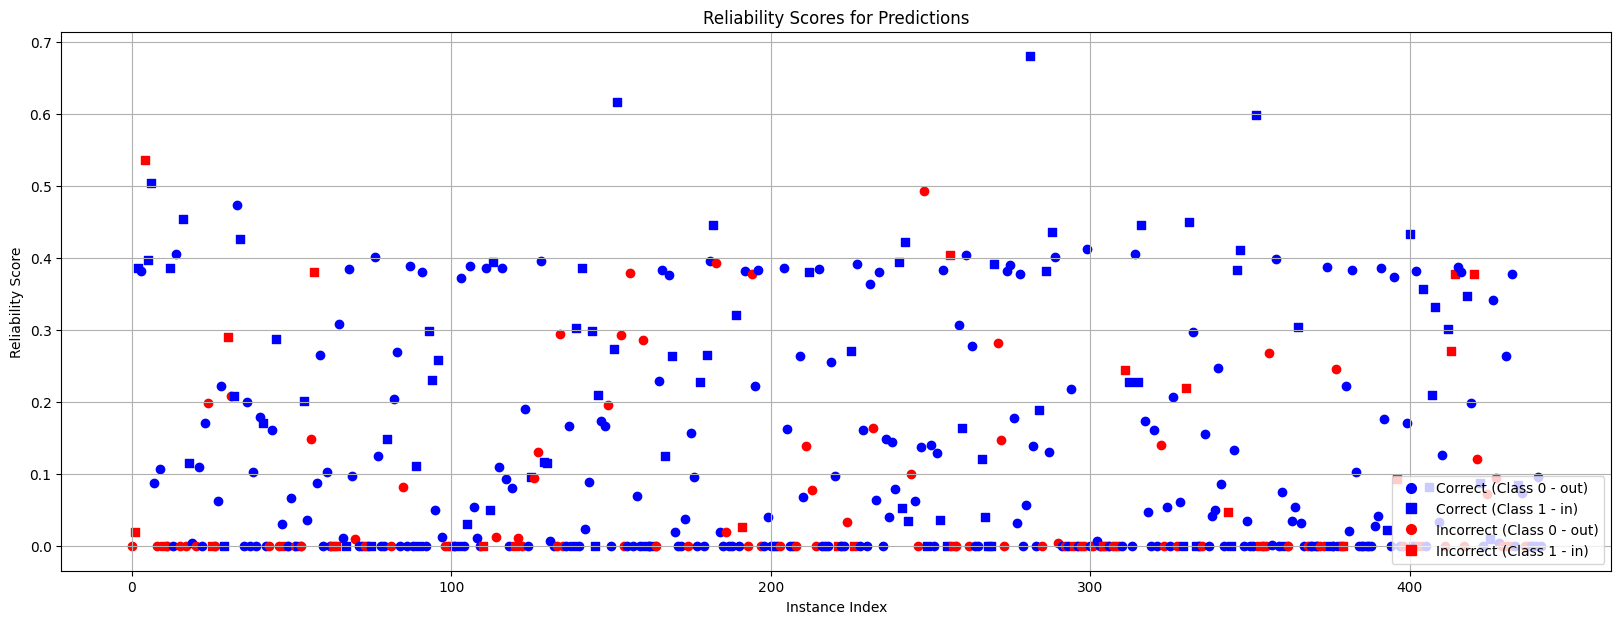

In [5]:
###########################################################
# Results
###########################################################
visualizer = ReliabilityVisualizer(results_df=results_df)

visualizer.plot_reliability_scores((20,7))

### 10

In [6]:
reliability_table_10_df = visualizer.get_reliability_table_10()
print(reliability_table_10_df)

    Reliability  Correct (0)  Incorrect (0)  Correct (1)  Incorrect (1)
0  [0.00, 0.10]          142             67           36             21
1  ]0.10, 0.20]           34              9           10              0
2  ]0.20, 0.30]           15              7           16              4
3  ]0.30, 0.40]           35              3           17              3
4  ]0.40, 0.50]            7              1            9              1
5  ]0.50, 0.60]            0              0            2              1
6  ]0.60, 0.70]            0              0            2              0
7  ]0.70, 0.80]            0              0            0              0
8  ]0.80, 0.90]            0              0            0              0
9  ]0.90, 1.00]            0              0            0              0


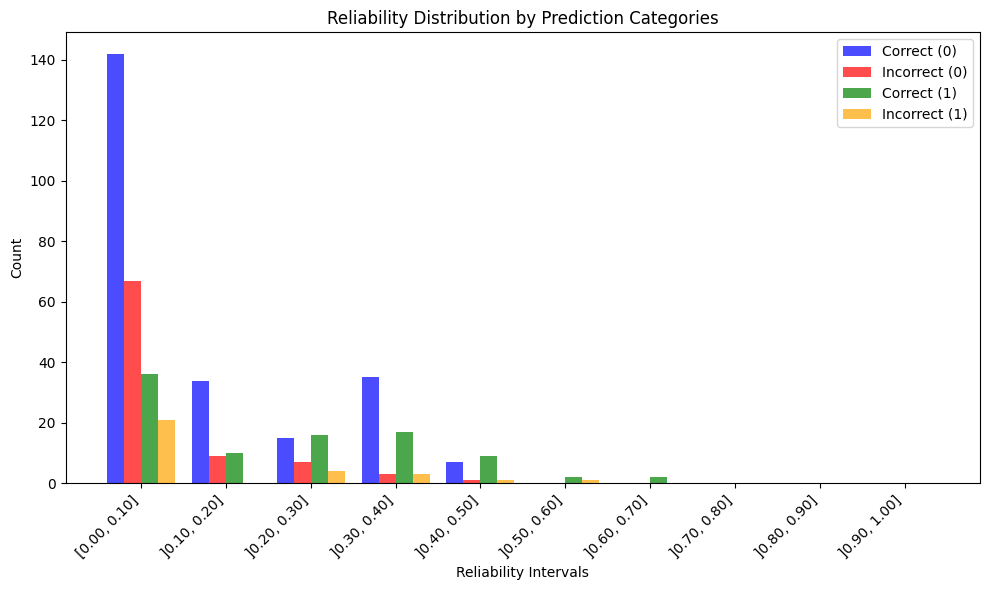

In [7]:
visualizer.plot_table_graph(reliability_table_10_df)

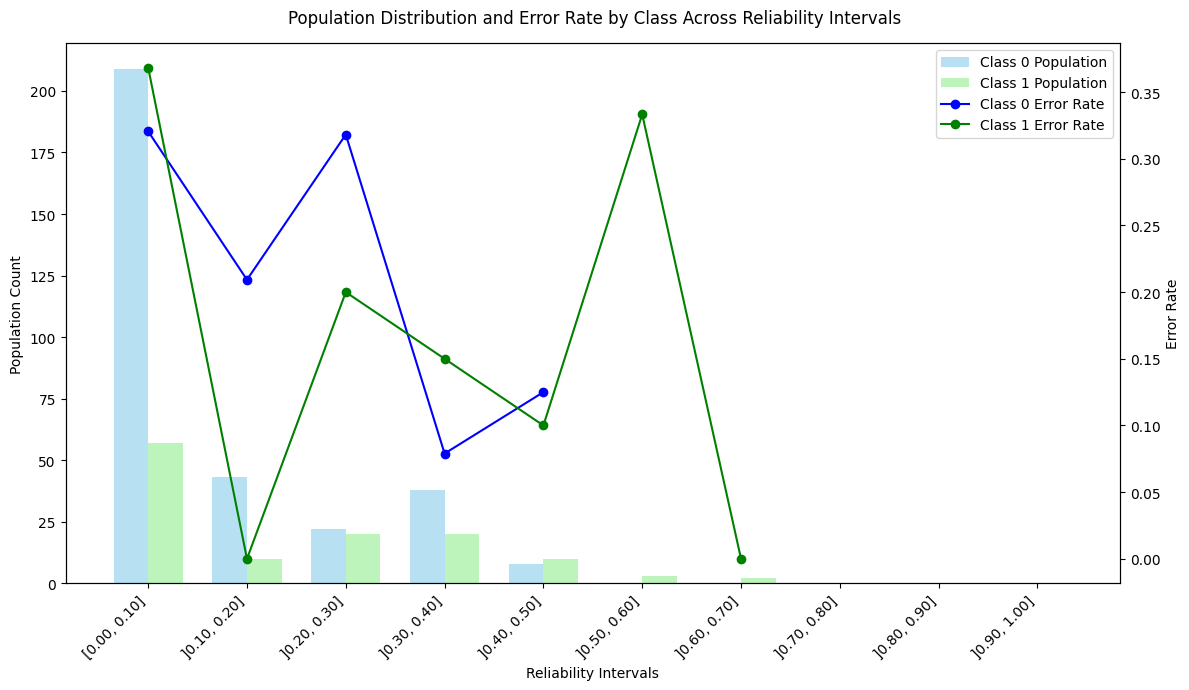

In [8]:
visualizer.plot_population_and_error_rate_by_class(reliability_table_10_df)

Sample reliability interval assignment:
   reliability_score reliability_interval
0           0.000000        (-0.001, 0.1]
1           0.020280        (-0.001, 0.1]
2           0.386504           (0.3, 0.4]
3           0.382109           (0.3, 0.4]
4           0.536055           (0.5, 0.6]
5           0.396531           (0.3, 0.4]
6           0.503635           (0.5, 0.6]
7           0.087772        (-0.001, 0.1]
8           0.000000        (-0.001, 0.1]
9           0.107779           (0.1, 0.2]


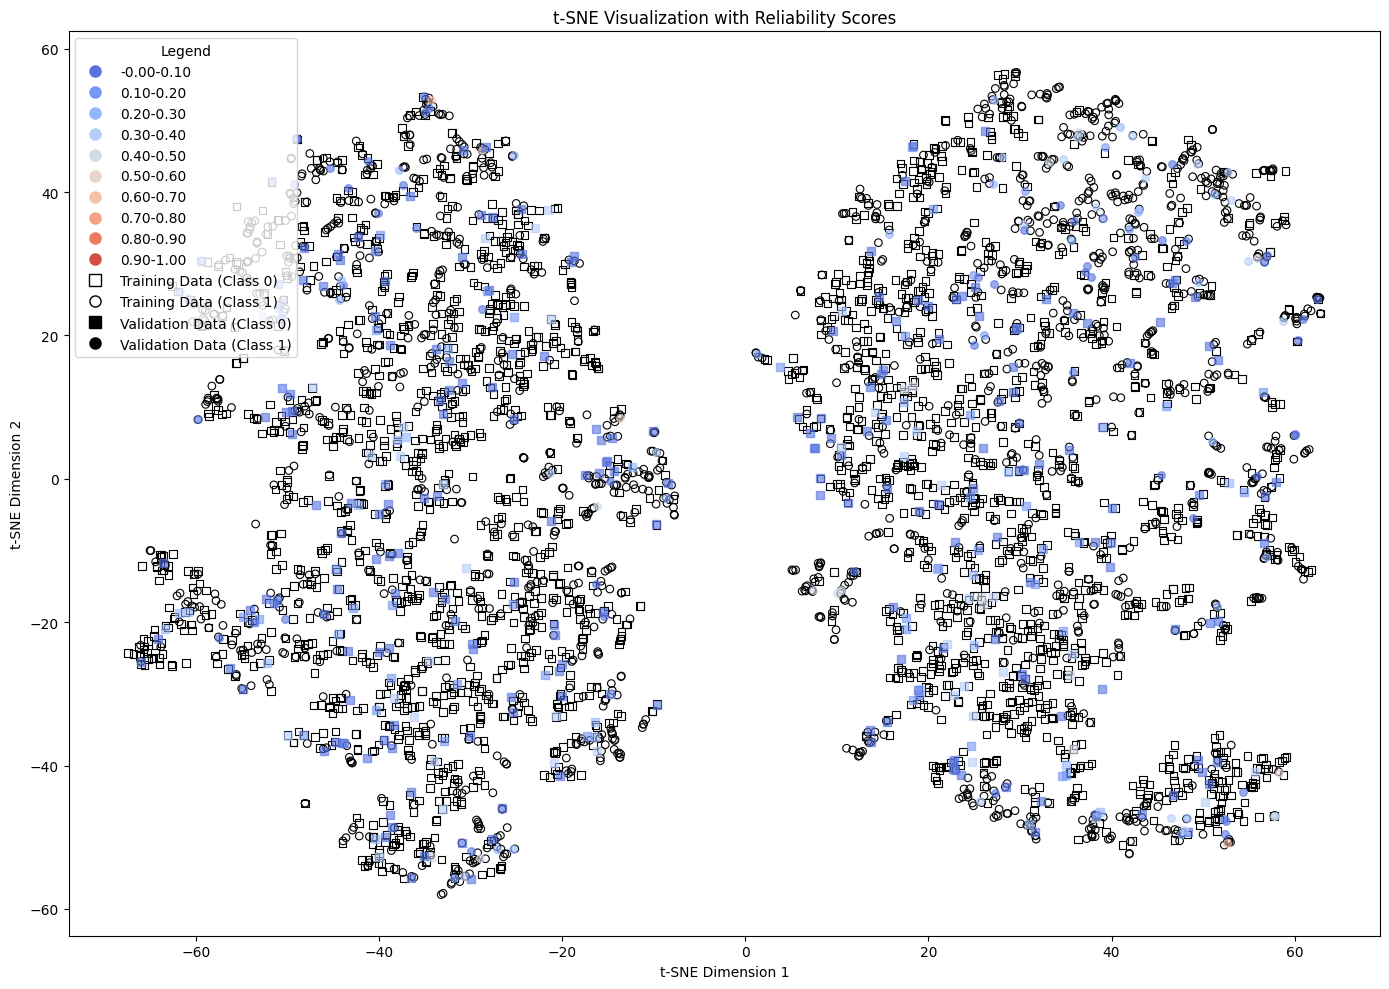

In [9]:
visualizer.plot_tsne_with_reliability(
    X_train_preprocessed, validation_data, y_train, pipeline
)